In [17]:
!pip install pycaret

In [18]:
#Modeling flow
#1. Load your data
#Load the 'pandas' library
import pandas as pd

#Link
link = 'C:\\Users\\renos\\OneDrive\\Desktop\\RModule\\outfile2.csv'

#Load a file
df = pd.read_csv(link)



#Retrieve the first two obs
df.head(2)

#head(df,2)    #R function-oriented
#df.head(2)    #Object oriented

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0


In [19]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
#4. Data modelling
#4a. Load desired model from pycaret
#regression:         'regression' 
#classification:     'classsification'
#clustering:         'clustering'

#from pycaret.'model' import *
from pycaret.classification import *

In [21]:
df.head(2)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0


In [22]:
#4b. Set up your data in Pycaret and define your variables types
set_up = setup(df,
       target                =  'target',
        train_size            =  .8,
        normalize             =  False,
        ignore_features       =  [],
        numeric_features      =  [],
        categorical_features  =  [],
        silent                =  True)

,Description,Value
0,session_id,7090
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(19040, 12)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
#Get dummies for the Cond
df_dummies = pd.get_dummies(df, columns = ['gender','relevent_experience',
'enrolled_university','education_level','major_discipline','experience','company_size','company_type',
                                           'last_new_job','target'], drop_first = False)


In [30]:
df = df_dummies

In [31]:
import matplotlib.pyplot as plt

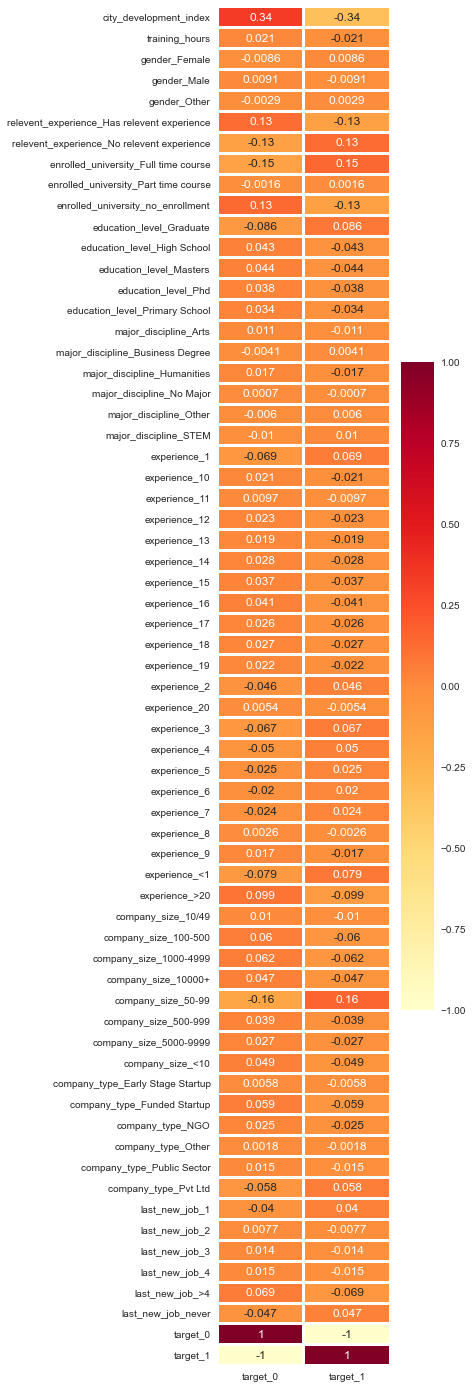

In [32]:
import seaborn as sb
plt.subplots(figsize=(10,25))
corr = df.corr()
#c1 = ['city_development_index','target_1']
c1 = df.columns
c2 = ['target_0','target_1']
sb.heatmap(corr.loc[c1, c2],annot=True,cmap = 'YlOrRd',linewidths=2)
plt.subplots_adjust(left=0.6)


In [23]:
#4c. Run all available models on the training
#using a 10-fold cross-validation
best_model = compare_models(fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7826,0.7791,0.4221,0.5971,0.4944,0.3612,0.3701,0.5470
lightgbm,Light Gradient Boosting Machine,0.7804,0.7805,0.4544,0.5824,0.5103,0.3716,0.3765,0.0830
ada,Ada Boost Classifier,0.7739,0.7775,0.3171,0.5962,0.4134,0.2895,0.3119,0.1820
ridge,Ridge Classifier,0.7674,0.0000,0.2603,0.5883,0.3603,0.2433,0.2739,0.0310
lda,Linear Discriminant Analysis,0.7667,0.7526,0.3335,0.5627,0.4184,0.2843,0.2997,0.1570
lr,Logistic Regression,0.7660,0.7535,0.2692,0.5780,0.3665,0.2459,0.2732,0.6890
rf,Random Forest Classifier,0.7552,0.7376,0.3554,0.5205,0.4221,0.2739,0.2820,0.5790
et,Extra Trees Classifier,0.7329,0.6864,0.3463,0.4600,0.3950,0.2281,0.2319,0.7850
knn,K Neighbors Classifier,0.7212,0.6084,0.2282,0.4056,0.2919,0.1350,0.1437,0.1600
dt,Decision Tree Classifier,0.7026,0.6104,0.4218,0.4125,0.4169,0.2174,0.2175,0.0680


In [24]:
#4d. Choose the best model based on your metric of choice
#and fit it to your data using a 10-fold cross-validation

model = create_model('lightgbm', fold = 10)

#Make it simpler
#model = best_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7782,0.7722,0.4453,0.5777,0.5029,0.3633,0.3684
1,0.7861,0.7930,0.4661,0.5967,0.5234,0.3882,0.3931
2,0.8017,0.8135,0.5026,0.6349,0.5610,0.4352,0.4402
3,0.7682,0.7679,0.4115,0.5544,0.4723,0.3280,0.3340
4,0.7748,0.7857,0.4635,0.5651,0.5093,0.3650,0.3680
5,0.7833,0.7684,0.4297,0.5978,0.5000,0.3664,0.3745
6,0.7682,0.7657,0.4375,0.5508,0.4877,0.3404,0.3442
7,0.7925,0.7878,0.4818,0.6126,0.5394,0.4079,0.4128
8,0.7702,0.7748,0.4491,0.5531,0.4957,0.3489,0.3521
9,0.7807,0.7765,0.4569,0.5814,0.5117,0.3729,0.3774


In [25]:
#4e. Tune the hyper-parameters of the model using a 10-fold cross-validation
model_tuned = tune_model(model, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7815,0.7837,0.4141,0.5955,0.4885,0.3552,0.3647
1,0.7867,0.7882,0.4089,0.6157,0.4914,0.3634,0.3756
2,0.8030,0.8065,0.4609,0.6556,0.5413,0.4207,0.4313
3,0.7695,0.7611,0.3776,0.5642,0.4524,0.3137,0.3238
4,0.7807,0.7834,0.4245,0.5906,0.4939,0.3587,0.3667
5,0.7840,0.7640,0.4036,0.6078,0.4851,0.3554,0.3673
6,0.7715,0.7605,0.4115,0.5643,0.4759,0.3344,0.3412
7,0.7873,0.7932,0.4349,0.6095,0.5076,0.3767,0.3854
8,0.7682,0.7729,0.4099,0.5528,0.4708,0.3265,0.3325
9,0.7853,0.7856,0.4256,0.6037,0.4992,0.3678,0.3769


In [ ]:
#Because the base model is  doing a better job than the tuned model, we'll keep the base model

In [26]:
#4f. Evaluate the performance on the testing set 
evaluate_model(model)

#ready to quit:1,stay:0

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
#4g. Apply your algorithm to your whole data
final_model = finalize_model(model)

In [28]:
#5. Predict
predict_model(final_model).head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8157,0.8588,0.5302,0.6380,0.5791,0.4624,0.4656


,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,...,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,target,Label,Score
0,0.890,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8942
1,0.624,54.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5883
2,0.855,43.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8661
3,0.920,28.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9461
4,0.579,32.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.6903
